In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('asp_df.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [4]:
df = data[['id','basin','region','permit','management_group','payment_type','extraction_type_class',
           'quality_group','quantity_group','source_type','waterpoint_type','status_group']]

In [5]:
df.head()

,id,basin,region,permit,management_group,payment_type,extraction_type_class,quality_group,quantity_group,source_type,waterpoint_type,status_group
0,69572,Lake Nyasa,Iringa,False,user-group,annually,gravity,good,enough,spring,communal standpipe,functional
1,8776,Lake Victoria,Mara,True,user-group,never pay,gravity,good,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,Pangani,Manyara,True,user-group,per bucket,gravity,good,enough,dam,communal standpipe multiple,functional
3,67743,Ruvuma / Southern Coast,Mtwara,True,user-group,never pay,submersible,good,dry,borehole,communal standpipe multiple,non functional
4,19728,Lake Victoria,Kagera,True,other,never pay,gravity,good,seasonal,rainwater harvesting,communal standpipe,functional


In [6]:
X = df.loc[:,['basin','quality_group','quantity_group','source_type','waterpoint_type']]
y = df.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

In [7]:
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

clss = DecisionTreeClassifier(criterion='entropy',max_depth=5)
clss.fit(X_train_ohe, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

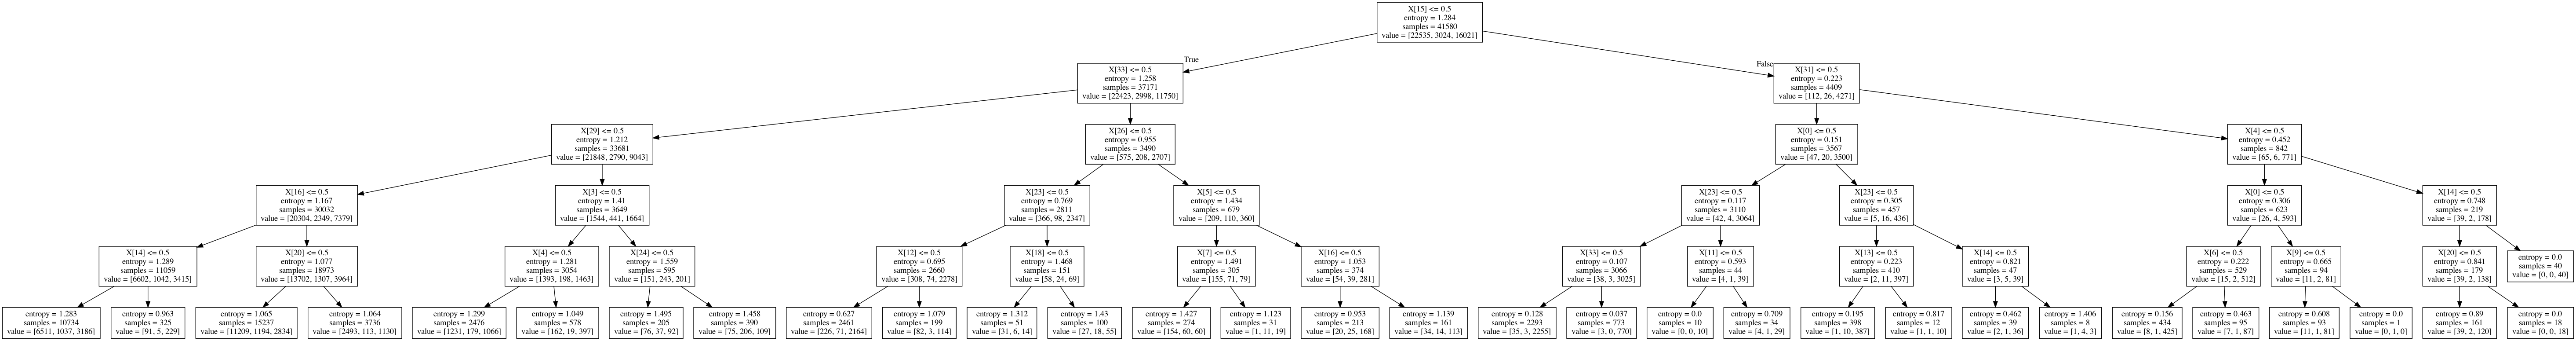

In [8]:
dot_data = export_graphviz(clss, out_file=None)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
X_test_ohe = ohe.transform(X_test)
y_preds = clss.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.7054433221099887


In [10]:
X = df.loc[:,['basin','quantity_group','extraction_type_class','source_type','waterpoint_type']]
y = df.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

In [11]:
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

clss2 = DecisionTreeClassifier(criterion='entropy',max_depth=5)
clss2.fit(X_train_ohe, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

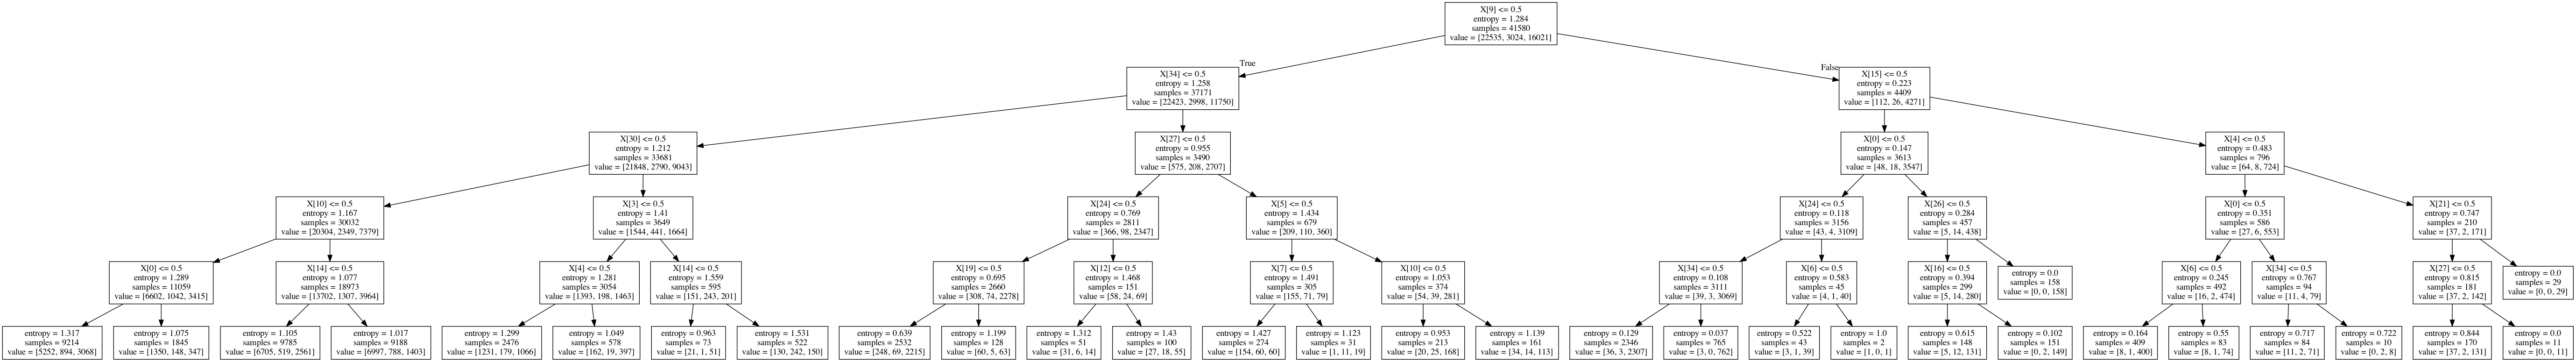

In [12]:
dot_data = export_graphviz(clss2, out_file=None)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
X_test_ohe = ohe.transform(X_test)
y_preds = clss2.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.7042648709315376


In [14]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators = 25)

In [15]:
rclf.fit(X_train_ohe, y_train)
y_pred=rclf.predict(X_test_ohe)

In [16]:
clss.feature_importances_

array([4.13336819e-03, 0.00000000e+00, 0.00000000e+00, 2.81547806e-02,
       1.08310119e-02, 1.15364616e-02, 5.22906908e-04, 2.66055007e-03,
       0.00000000e+00, 5.52007076e-04, 0.00000000e+00, 1.83586656e-04,
       8.48024241e-03, 3.68815107e-04, 1.73323655e-02, 5.20578453e-01,
       3.37008247e-02, 0.00000000e+00, 1.09098994e-03, 0.00000000e+00,
       2.18409618e-02, 0.00000000e+00, 0.00000000e+00, 1.00949302e-02,
       4.81949270e-03, 0.00000000e+00, 1.83270927e-02, 0.00000000e+00,
       0.00000000e+00, 5.84130049e-02, 0.00000000e+00, 5.72461571e-03,
       0.00000000e+00, 2.40653538e-01])

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
pred = rclf.predict(X_test_ohe)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[8967   62  695]
 [ 973  119  201]
 [2747   57 3999]]
                         precision    recall  f1-score   support

             functional       0.71      0.92      0.80      9724
functional needs repair       0.50      0.09      0.16      1293
         non functional       0.82      0.59      0.68      6803

               accuracy                           0.73     17820
              macro avg       0.67      0.53      0.55     17820
           weighted avg       0.73      0.73      0.71     17820



In [24]:
rclf2 = RandomForestClassifier(n_estimators = 25, class_weight='balanced_subsample')
rclf2.fit(X_train_ohe, y_train)
y_pred2 = rclf2.predict(X_test_ohe)

In [25]:
rclf2.feature_importances_

array([2.81550818e-02, 2.16765681e-02, 2.25116299e-02, 3.94800209e-02,
       4.81052277e-02, 2.91650441e-02, 3.36836533e-02, 2.07874940e-02,
       1.83032948e-02, 1.81471530e-01, 6.44321159e-02, 4.56127845e-02,
       2.62314194e-02, 1.19177969e-02, 4.32960804e-02, 1.58052589e-02,
       9.93437588e-03, 5.76784064e-02, 3.67220103e-03, 1.75474703e-02,
       2.41587708e-03, 2.53895544e-02, 7.60486044e-03, 3.60584439e-03,
       1.87940841e-02, 2.58233572e-02, 1.98940894e-02, 2.96121544e-02,
       1.57418806e-03, 2.39665378e-02, 2.39530822e-02, 6.63033225e-05,
       1.26751151e-02, 5.62726272e-03, 5.95302354e-02])

In [26]:
pred = rclf2.predict(X_test_ohe)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[6145 2770  809]
 [ 353  815  125]
 [1664 1156 3983]]
                         precision    recall  f1-score   support

             functional       0.75      0.63      0.69      9724
functional needs repair       0.17      0.63      0.27      1293
         non functional       0.81      0.59      0.68      6803

               accuracy                           0.61     17820
              macro avg       0.58      0.62      0.55     17820
           weighted avg       0.73      0.61      0.65     17820



In [27]:
rclf3 = RandomForestClassifier(n_estimators = 25, class_weight='balanced')
rclf3.fit(X_train_ohe, y_train)
y_pred2 = rclf3.predict(X_test_ohe)
rclf3.feature_importances_

array([3.00041363e-02, 1.99073336e-02, 2.27888939e-02, 3.97785389e-02,
       4.59500489e-02, 2.69564026e-02, 3.30129524e-02, 2.28468920e-02,
       1.64359003e-02, 1.92518275e-01, 6.12046913e-02, 4.11643988e-02,
       1.71286338e-02, 1.05221516e-02, 4.01287186e-02, 1.56286410e-02,
       1.14138599e-02, 5.87857424e-02, 3.98691267e-03, 2.03800661e-02,
       2.59986393e-03, 2.55399833e-02, 7.75862152e-03, 4.05736514e-03,
       2.21771841e-02, 2.84740504e-02, 1.90736726e-02, 3.27064415e-02,
       1.54555049e-03, 2.84141745e-02, 2.49074584e-02, 1.03616089e-04,
       1.58700625e-02, 5.14828577e-03, 5.10804799e-02])

In [35]:
pred3 = rclf3.predict(X_test_ohe)

print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))

[[6032 2834  858]
 [ 340  829  124]
 [1602 1188 4013]]
                         precision    recall  f1-score   support

             functional       0.76      0.62      0.68      9724
functional needs repair       0.17      0.64      0.27      1293
         non functional       0.80      0.59      0.68      6803

               accuracy                           0.61     17820
              macro avg       0.58      0.62      0.54     17820
           weighted avg       0.73      0.61      0.65     17820



In [29]:
rclf4 = RandomForestClassifier(n_estimators = 100, class_weight='balanced')
rclf4.fit(X_train_ohe, y_train)
y_pred4 = rclf4.predict(X_test_ohe)
rclf4.feature_importances_

array([2.95972809e-02, 2.09193341e-02, 2.19961516e-02, 3.89356441e-02,
       4.68757231e-02, 2.68597141e-02, 3.14858570e-02, 2.07795025e-02,
       1.75689281e-02, 1.92346389e-01, 5.59285206e-02, 4.19552639e-02,
       2.26699216e-02, 1.15595933e-02, 3.99012776e-02, 1.58954646e-02,
       1.05264085e-02, 6.44600567e-02, 3.82073817e-03, 1.97533478e-02,
       2.29465056e-03, 2.72490260e-02, 7.43186351e-03, 3.99676008e-03,
       1.80402438e-02, 2.92220838e-02, 2.22976851e-02, 2.92628731e-02,
       1.56252240e-03, 2.78193395e-02, 2.32559009e-02, 9.99291994e-05,
       1.64102694e-02, 7.13367652e-03, 5.00880593e-02])

In [34]:
pred4 = rclf4.predict(X_test_ohe)

print(confusion_matrix(y_test, pred4))
print(classification_report(y_test, pred4))

[[6175 2684  865]
 [ 364  800  129]
 [1660 1123 4020]]
                         precision    recall  f1-score   support

             functional       0.75      0.64      0.69      9724
functional needs repair       0.17      0.62      0.27      1293
         non functional       0.80      0.59      0.68      6803

               accuracy                           0.62     17820
              macro avg       0.58      0.61      0.55     17820
           weighted avg       0.73      0.62      0.66     17820



In [31]:
rclf5 = RandomForestClassifier(n_estimators = 100, random_state=42)
rclf5.fit(X_train_ohe, y_train)
y_pred5 = rclf5.predict(X_test_ohe)
rclf5.feature_importances_

array([2.02614830e-02, 1.34437565e-02, 1.64627748e-02, 2.16641051e-02,
       2.81301344e-02, 1.84339497e-02, 1.51114240e-02, 1.35703920e-02,
       1.57615536e-02, 2.40408621e-01, 8.19093312e-02, 4.29716108e-02,
       1.98850310e-02, 1.29163673e-02, 2.35360975e-02, 2.06735569e-02,
       1.09711926e-02, 7.71089313e-02, 3.52155838e-03, 1.33805019e-02,
       1.53232776e-03, 1.62524039e-02, 7.78323652e-03, 3.98200870e-03,
       1.47968155e-02, 1.68248215e-02, 1.70492060e-02, 2.31872618e-02,
       1.58928754e-03, 3.30300950e-02, 2.62266422e-02, 1.08548236e-04,
       1.95068635e-02, 5.98109961e-03, 1.02027009e-01])

In [33]:
pred5 = rclf5.predict(X_test_ohe)

print(confusion_matrix(y_test, pred5))
print(classification_report(y_test, pred5))

[[8982   61  681]
 [ 975  119  199]
 [2761   56 3986]]
                         precision    recall  f1-score   support

             functional       0.71      0.92      0.80      9724
functional needs repair       0.50      0.09      0.16      1293
         non functional       0.82      0.59      0.68      6803

               accuracy                           0.73     17820
              macro avg       0.68      0.53      0.55     17820
           weighted avg       0.73      0.73      0.71     17820



In [36]:
rclf6 = RandomForestClassifier(n_estimators = 1000, random_state=42)
rclf6.fit(X_train_ohe, y_train)
y_pred6 = rclf6.predict(X_test_ohe)
rclf6.feature_importances_

array([2.03359693e-02, 1.39703704e-02, 1.69748071e-02, 2.06603309e-02,
       2.77388675e-02, 1.84312182e-02, 1.55226993e-02, 1.38717398e-02,
       1.52739820e-02, 2.45401363e-01, 8.22698255e-02, 4.24486963e-02,
       1.88385924e-02, 1.21315186e-02, 2.29363282e-02, 2.11851552e-02,
       1.03072314e-02, 8.04368104e-02, 3.61860742e-03, 1.41427303e-02,
       1.55709938e-03, 1.66928330e-02, 8.05463405e-03, 4.00858356e-03,
       1.43267237e-02, 1.75559925e-02, 1.64148612e-02, 2.27917012e-02,
       1.42140212e-03, 3.58046391e-02, 2.54250853e-02, 1.09831275e-04,
       1.73981077e-02, 5.77241120e-03, 9.61692514e-02])

In [37]:
pred6 = rclf6.predict(X_test_ohe)

print(confusion_matrix(y_test, pred6))
print(classification_report(y_test, pred6))

[[8979   60  685]
 [ 977  118  198]
 [2750   55 3998]]
                         precision    recall  f1-score   support

             functional       0.71      0.92      0.80      9724
functional needs repair       0.51      0.09      0.15      1293
         non functional       0.82      0.59      0.68      6803

               accuracy                           0.73     17820
              macro avg       0.68      0.53      0.55     17820
           weighted avg       0.74      0.73      0.71     17820

